In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

## Definición de variables:

In [21]:
N = 20  # Numero de espines en un lado de la red cuadrada
J = 1 # Valor de J
tiempo = 1000000 # Numero de iteraciones
k = 1 # Constante de Boltzmann (se define 1 en unidades naturales)
T_c = (2*J)/(k*0.881364) # Temperatura critica
T = 3.5 # Temperatura

## Definición de funciones auxiliares y primera corrida del código para una temperatura T fija.

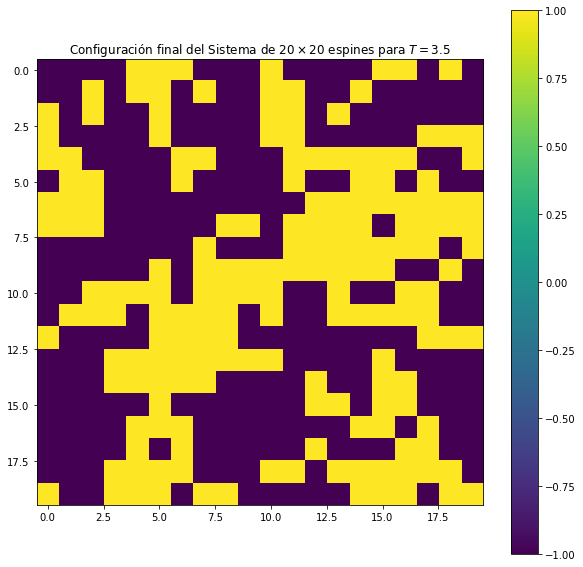

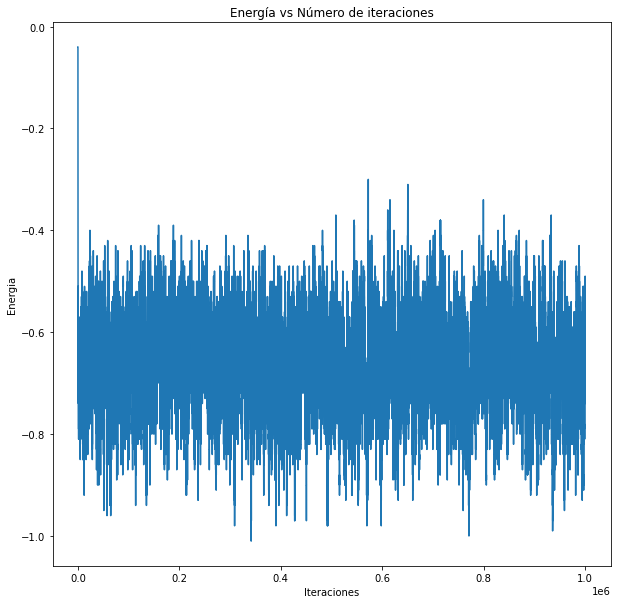

&lt;Figure size 432x288 with 0 Axes&gt;

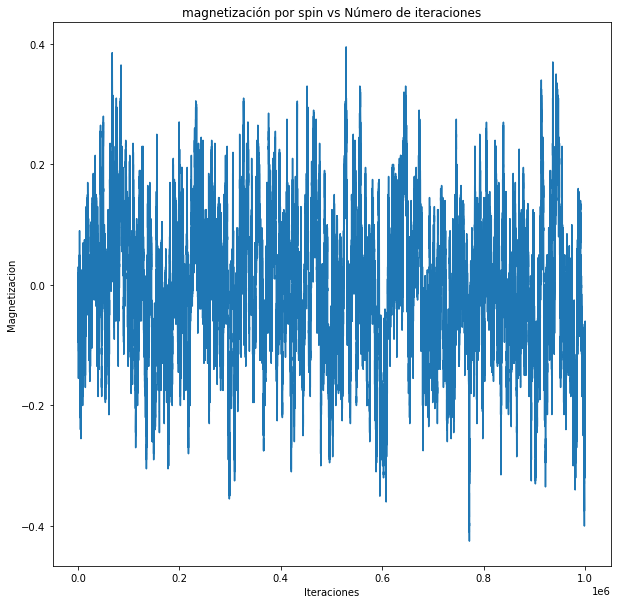

2.2692099972315636 -264.48512 -0.022041316666666668


&lt;Figure size 432x288 with 0 Axes&gt;

In [22]:
def crear_red(N): # Funcion que crea cadena de espines. Espin arriba = 1, Espin abajo = -1
    red =  2* np.random.randint(2, size=(int(N),int(N))) -1 # Se crea una red (matriz) de NxN con valores de 1 o -1. 
    return red

def energia(red): # Funcion que permite encontrar la energia total de la red
    centro, shift_arriba, shift_derecha =red, np.roll(red,+1,axis=0), np.roll(red,+1,axis=1)   
    suma = np.sum((shift_arriba + shift_derecha)*centro)
    return -J*suma

def magnetizacion(red): # Funcion que encuentra la magnetizacion por espin para uan configuracion de la red
    m = np.mean(red)
    return m

def posicion_al_azar(N): # Funcion para obtener una posicion aleatoria dentro de la red
    return np.random.randint(N, size=2)

def cambiar_spin(red,posicion): # Funcion que cambia un spin de estado (de +1 a -1 y viceversa).
    nueva_red = np.copy(red)
    nueva_red[posicion[0],posicion[1]] = -red[posicion[0],posicion[1]]
    return nueva_red

def metropolis(red,T): # Funcion que ejecuta todo el algoritmo de metropolis para cierta temperatura T
    energias = [] # Se crea vector que almacena las energias en cada iteracion
    magnetizaciones = []
    energias.append(energia(red))
    magnetizaciones.append(magnetizacion(red))

    for i in range(1,tiempo):
        posicion = posicion_al_azar(N) # Segundo paso
        nueva_red = cambiar_spin(red,posicion)
        energia_nueva_red = energia(nueva_red)
        delta_E = energia_nueva_red - energias[i-1] # Tercer paso
        if(delta_E <=0): # Cuarto a quinto paso. El "for" permite ejecutar el sexto paso del algoritmo
            red = nueva_red
            energias.append(energia(red))
            magnetizaciones.append(magnetizacion(red))
        else:
            p = rnd.uniform(0,1)
            peso = np.exp(-(delta_E)/(k*T))
            if(p<peso):
                red = nueva_red
                energias.append(energia(red))
                magnetizaciones.append(magnetizacion(red))
            else:
                energias.append(energia(red))
                magnetizaciones.append(magnetizacion(red))

        if(i==tiempo-1): # Se guarda en una imagen png la configuración final de la red.
            plt.figure(figsize=(10,10))
            plt.imshow(red)
            plt.colorbar()
            plt.title(r"Configuración final del Sistema de $20 \times 20$ espines para $T=$"+str(T))
            plt.savefig("Configuracion_T"+str(T)+".png")

    return np.array(energias), np.array(magnetizaciones), np.mean(np.array(energias)[int(0.7*tiempo):]), np.mean(np.array(magnetizaciones)[int(0.7*tiempo):]) # como salidas de la funcion metropolis se ponen las energias por cada iteracion, la magnetizacion por iteracion y los promedios de energia y magnetizacion para el ultimo 30 porciento de las iteraciones del algoritmo

red = crear_red(N) # Primer paso del algoritmo
energias,magnetizaciones, prom_energias, prom_magnetizaciones = metropolis(red,T) # Se ejecutan los pasos del algoritmo del 2 al 6 para una temperatura fija

plt.figure(figsize=(10,10)) # Se grafica la energia por espin contra el numero de iteraciones
plt.plot(np.linspace(0,tiempo,tiempo),energias/N**2)
plt.xlabel("Iteraciones")
plt.ylabel("Energia")
plt.title("Energía vs Número de iteraciones")
plt.show()
plt.clf()

plt.figure(figsize=(10,10)) # Se grafica la magnetizacion por espin contra el numero de iteraciones
plt.plot(np.linspace(0,tiempo,tiempo),magnetizaciones)
plt.xlabel("Iteraciones")
plt.ylabel("Magnetizacion")
plt.title("magnetización por spin vs Número de iteraciones")
plt.show()
plt.clf()

print(T_c, prom_energias, prom_magnetizaciones)

## Ejecucion del algoritmo de Metropolis para distintas temperaturas

In [4]:
temperaturas = np.array([0.8,1,1.2,1.4,1.6,1.8,2,2.1,2.2,T_c,2.30,2.40,2.50,2.70,2.90,3.10,3.30,3.50,3.70,3.90,4.00])
energias_promedio = np.zeros(len(temperaturas))
magnetizaciones_promedio = np.zeros(len(temperaturas))

red = crear_red(N) # Se ejecuta el algoritmo de metropolis para las temperaturas definidas en el array "temperaturas"
for i,T in enumerate(temperaturas):
    energias,magnetizaciones, prom_energias, prom_magnetizaciones = metropolis(red,T)
    energias_promedio[i] = prom_energias
    magnetizaciones_promedio[i] = prom_magnetizaciones

## Graficas de energia y magnetizacion por espin contra temperatura con los datos encontrados anteriormente

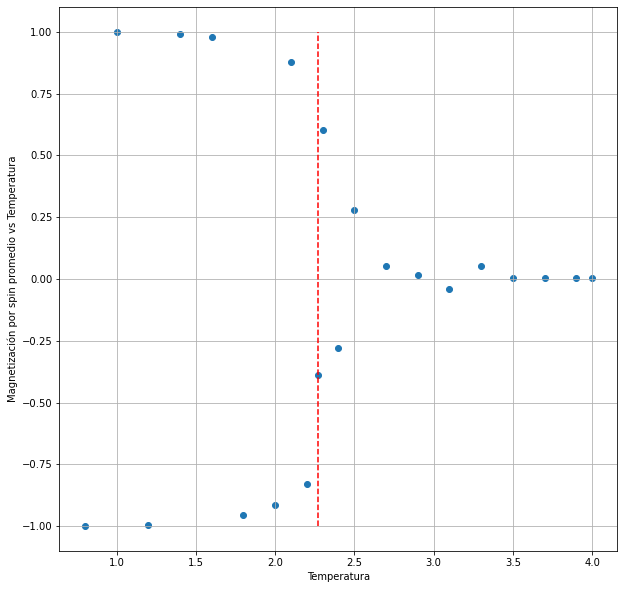

&lt;Figure size 432x288 with 0 Axes&gt;

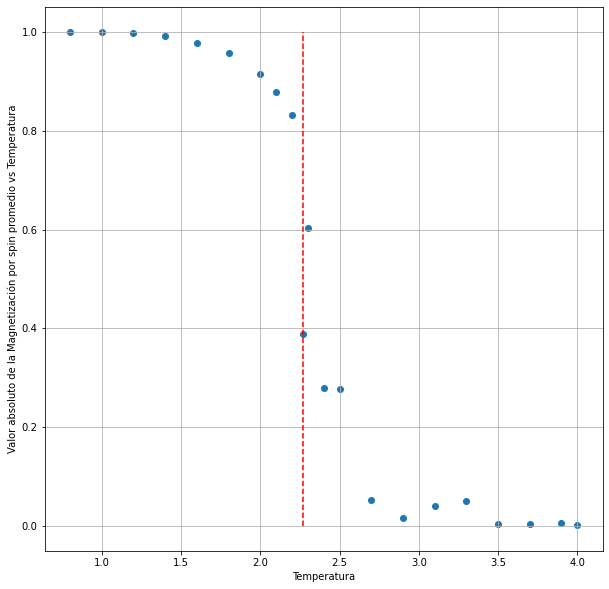

&lt;Figure size 432x288 with 0 Axes&gt;

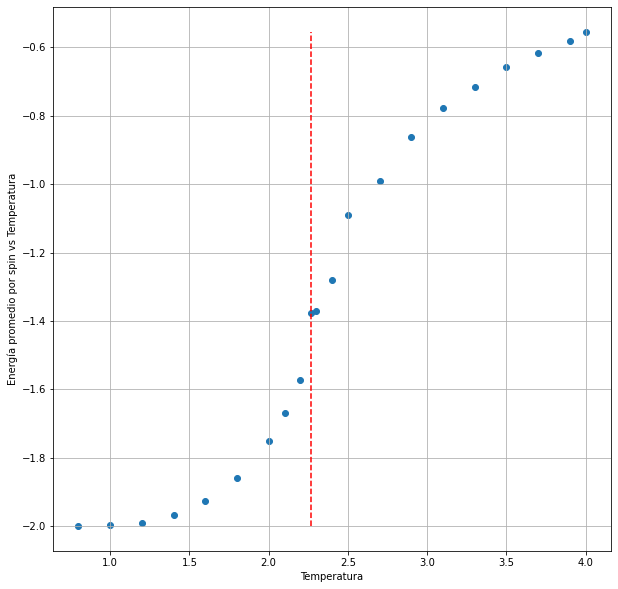

In [10]:
vertical_1 = np.linspace(-1,1,100)
vertical_2 = np.linspace(0,1,100)
vertical_3 = np.linspace(np.amin(energias_promedio/N**2),np.amax(energias_promedio/N**2),100)

# Se realizan los graficos de energia promedio por espin y magnetizacion promedio por espin contra temperatura

plt.figure(figsize=(10,10))
plt.scatter(temperaturas, magnetizaciones_promedio)
plt.plot(T_c*np.ones(len(vertical_1)),vertical_1,"--r")
plt.grid(True)
plt.xlabel("Temperatura")
plt.ylabel("Magnetización por spin promedio vs Temperatura")
plt.show()
plt.clf()

plt.figure(figsize=(10,10))
plt.scatter(temperaturas, abs(magnetizaciones_promedio))
plt.plot(T_c*np.ones(len(vertical_2)),vertical_2,"--r")
plt.grid(True)
plt.xlabel("Temperatura")
plt.ylabel("Valor absoluto de la Magnetización por spin promedio vs Temperatura")
plt.show()
plt.clf()

plt.figure(figsize=(10,10))
plt.scatter(temperaturas, energias_promedio/N**2)
plt.plot(T_c*np.ones(len(vertical_3)),vertical_3,"--r")
plt.xlabel("Temperatura")
plt.ylabel("Energía promedio por spin vs Temperatura")
plt.grid(True)
plt.show()